<a href="https://colab.research.google.com/github/cjuangab/EstadisticayExploraciondeDatosII/blob/main/Evidencia_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  **College Dataset**

**Tecnica 1:**

**Correlacion de Pearson**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid", context="notebook")


url = "https://raw.githubusercontent.com/cjuangab/EstadisticayExploraciondeDatosII/main/Datos/Datos_Estudiantes.csv"
df = pd.read_csv(url)

#Vista rápida del DataSet

print("Dimensiones (filas, columnas):", df.shape)
print("\nPrimeras filas:")
display(df.head(10))


Dimensiones (filas, columnas): (10000, 10)

Primeras filas:


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
5,CLG0015,96,5.26,5.32,7,No,5,8,0,No
6,CLG0071,123,6.68,6.58,5,No,7,8,2,Yes
7,CLG0096,111,8.77,8.76,7,No,3,1,2,Yes
8,CLG0097,92,6.47,6.33,9,No,7,8,5,No
9,CLG0057,108,8.82,8.60,4,No,5,9,1,No


# **Columnas**
*College_ID:* ID único de la universidad (ej.: CLG0001 a CLG0100).

*IQ:* Coeficiente intelectual del estudiante (normalmente distribuido alrededor de 100).

*Prev_Sem_Result:* Promedio del semestre anterior (GPA) — rango: 5,0 a 10,0.

*CGPA:* Promedio general acumulado (CGPA) — rango aproximado: 5,0 a 10,0.

*Academic_Performance:* Calificación académica anual — escala: 1 a 10.

*Internship_Experience:* Si el estudiante completó alguna pasantía — Sí/No.

*Extra_Curricular_Score:* Participación en actividades extracurriculares — puntaje de 0 a 10.

*Communication_Skills:* Habilidades de comunicación (habilidades blandas) — escala: 1 a 10.

*Projects_Completed*: Cantidad de proyectos académicos/técnicos completados — de 0 a 5.

*Placement:* Resultado final de colocación laboral (Sí = con empleo/ubicado, No = sin empleo).

A continuacion haremos un chequeo para ver si existe algun dato nulo o duplicado y que tipos de datos posee cada columna

In [ ]:
print("\nInformación de tipos y nulos:")
print(df.info())

print("\nMuestra aleatoria:")
display(df.sample(min(10, len(df)), random_state=42))

print("\nConteo de valores nulos por columna:")
display(df.isna().sum())

print("\nFilas completamente duplicadas (conteo):", df.duplicated().sum())



Información de tipos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  object 
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 703.3+ KB
None

Muestra aleatoria:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
6252,139,7.29,7.24,8,No,8,4,4,No
4684,84,8.28,8.49,8,Yes,3,3,5,No
1731,94,5.26,5.66,8,No,7,10,4,No
4742,100,6.22,6.29,6,Yes,8,6,3,No
4521,116,5.99,6.39,6,No,2,9,5,Yes
6340,86,5.68,5.54,3,No,6,1,1,No
576,103,8.63,8.79,6,Yes,0,8,2,Yes
5202,102,5.22,4.83,8,No,8,4,5,No
6363,110,7.77,7.48,6,No,4,6,1,No
439,99,9.55,9.84,6,No,6,6,4,No



Conteo de valores nulos por columna:


,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0



Filas completamente duplicadas (conteo): 0


Como se observa, no existen datos nulos o duplicados, por otro lado decidimos que los ID de los alumnos no aportan ninguna informacion significativa para el analisis y que pueden presentar alguna vulnerabilidad de privacidad, por lo que decidimos eliminar dicha columna

---



In [ ]:
cols_before = df.columns.tolist()
if "College_ID" in df.columns:
    df = df.drop(columns=["College_ID"])
    print("\nColumna 'College_ID' eliminada.")
else:
    print("\nAviso: no se encontró la columna 'College_ID'; no se eliminó nada.")

print("\nColumnas antes:", cols_before)
print("Columnas después:", df.columns.tolist())

#Vista breve de la nueva tabla

print("\nPrimeras filas de la tabla actualizada:")
display(df.head(10))



Columna 'College_ID' eliminada.

Columnas antes: ['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']
Columnas después: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']

Primeras filas de la tabla actualizada:


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No
5,96,5.26,5.32,7,No,5,8,0,No
6,123,6.68,6.58,5,No,7,8,2,Yes
7,111,8.77,8.76,7,No,3,1,2,Yes
8,92,6.47,6.33,9,No,7,8,5,No
9,108,8.82,8.60,4,No,5,9,1,No


Luego analizamos estadisticamente por tipo de variables numericas y categoricas

In [ ]:
# Detectar variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("\nVariables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

# a) Estadísticos numéricos (describe + varianza + asimetría + curtosis)
desc = df[num_cols].describe(percentiles=[0.25, 0.5, 0.75]).T if num_cols else pd.DataFrame()
if not desc.empty:
    desc["variance"] = df[num_cols].var()
    desc["skewness"] = df[num_cols].skew()
    desc["kurtosis"] = df[num_cols].kurtosis()
    print("\nEstadísticos de variables numéricas:")
    display(desc)



Variables numéricas: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']
Variables categóricas: ['Internship_Experience', 'Placement']

Estadísticos de variables numéricas:


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00,226.595864,0.000698,0.027249
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00,2.095311,-0.034056,-1.193373
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46,2.161315,-0.032913,-1.109812
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00,8.256873,-0.016208,-1.225981
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00,9.986252,0.010220,-1.220497
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00,8.415022,-0.014202,-1.243721
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00,2.944515,-0.013623,-1.277119


A continuacion chequeamos si hay alguna variable cualitativa

In [ ]:
# b) Estadísticos para cualitativas: frecuencias y frecuencias relativas
cat_summary = {}
for c in cat_cols:
    vc = df[c].value_counts(dropna=False)
    rel = df[c].value_counts(normalize=True, dropna=False).round(4)
    cat_summary[c] = pd.DataFrame({"frecuencia": vc, "frecuencia_relativa": rel})
    print(f"\nFrecuencias para {c}:")
    display(cat_summary[c])





Frecuencias para Internship_Experience:


,frecuencia,frecuencia_relativa
Internship_Experience,,
No,6036,0.6036
Yes,3964,0.3964



Frecuencias para Placement:


,frecuencia,frecuencia_relativa
Placement,,
No,8341,0.8341
Yes,1659,0.1659


Realizamos histogramas para las variables numericas

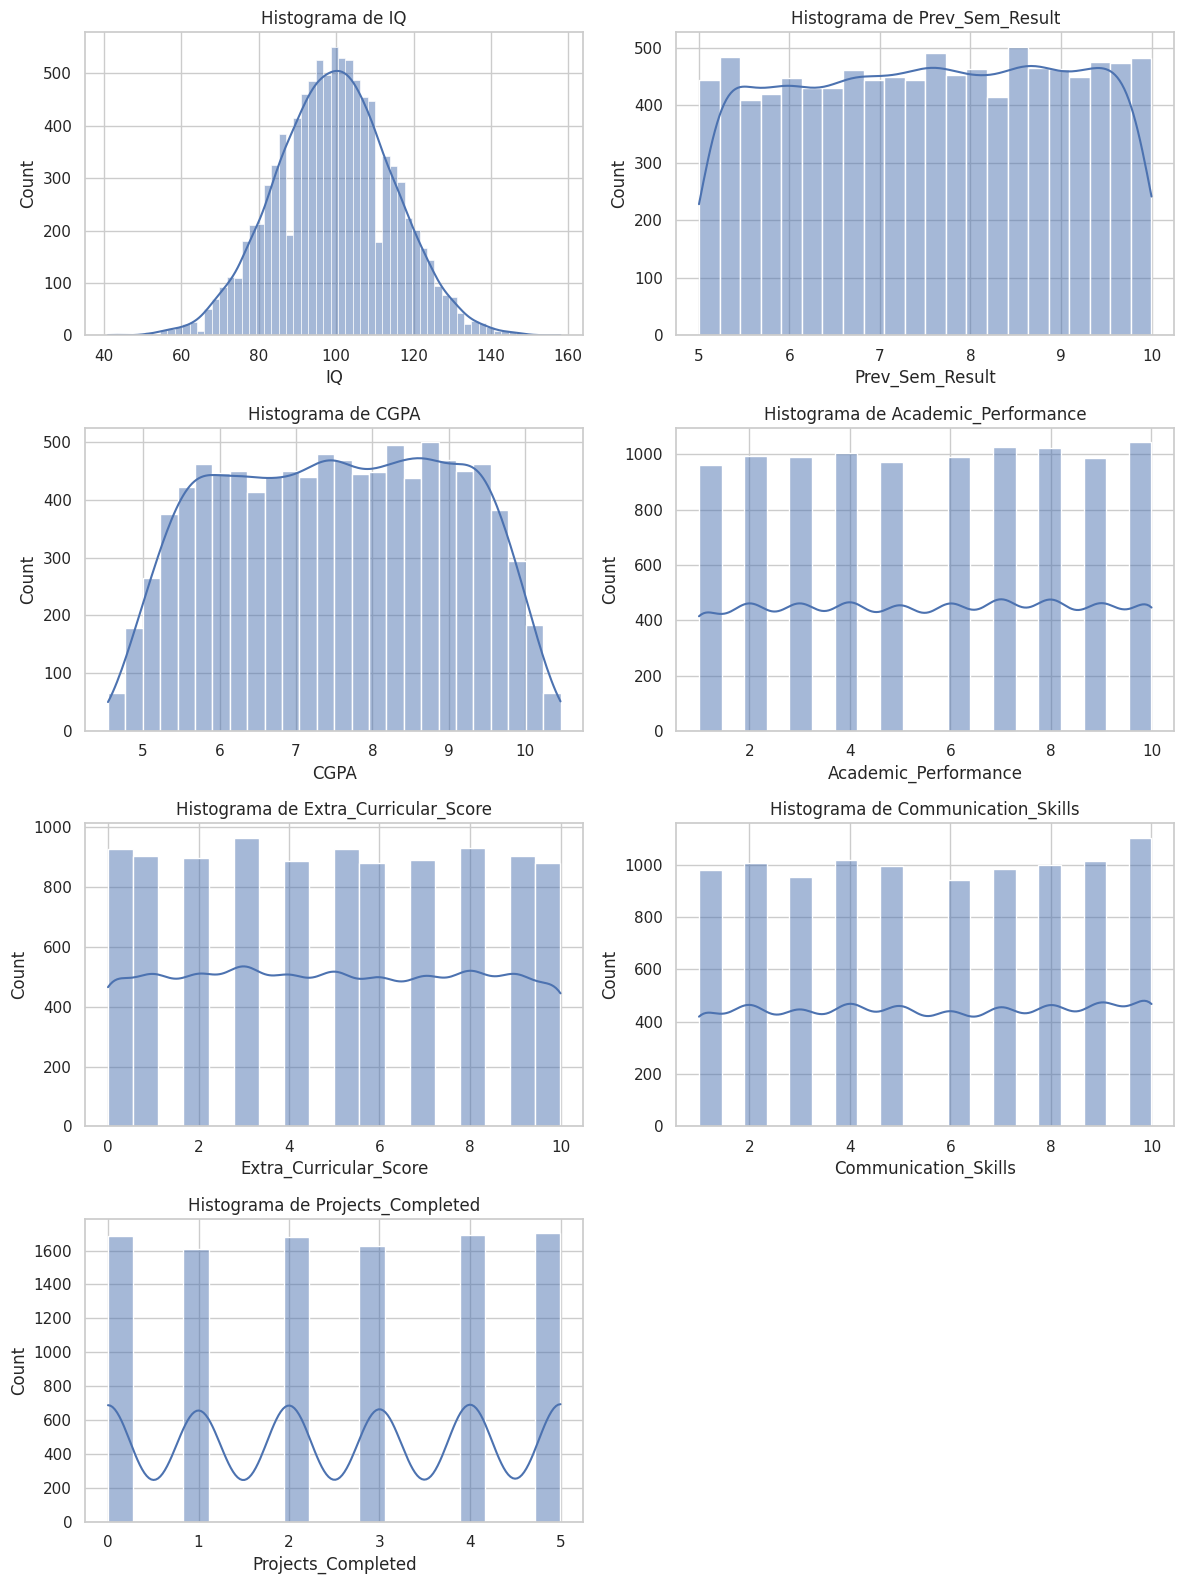

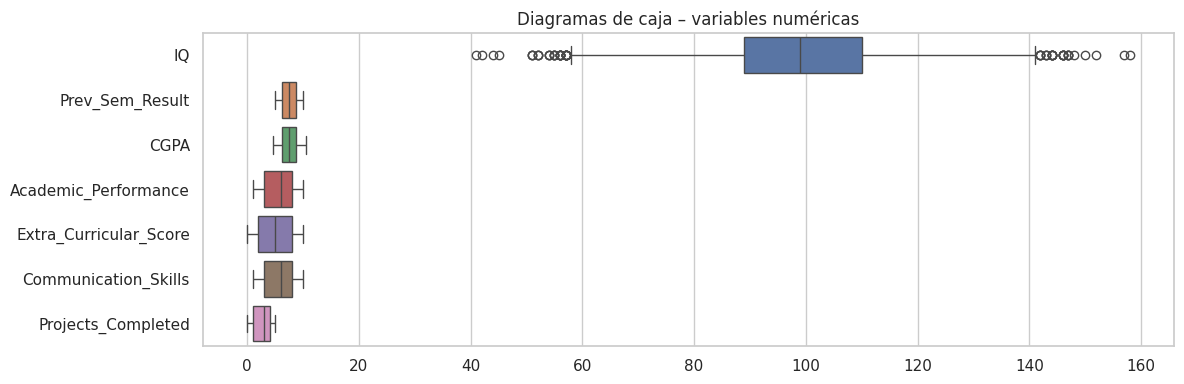

In [ ]:
Histogramas para todas las numéricas
if num_cols:
    n = len(num_cols)
    ncols = 2
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4*nrows))
    axes = axes.flatten() if n > 1 else [axes]
    for i, col in enumerate(num_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")
# Ocultar subplots vacíos si los hay
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.tight_layout()
    plt.show()
#Diagramas de caja (boxplots) de numéricas
if num_cols:
    plt.figure(figsize=(12, max(4, 0.5*len(num_cols))))
    sns.boxplot(data=df[num_cols], orient="h")
    plt.title("Diagramas de caja – variables numéricas")
    plt.tight_layout()
    plt.show()


Estudio de las variables categoricas

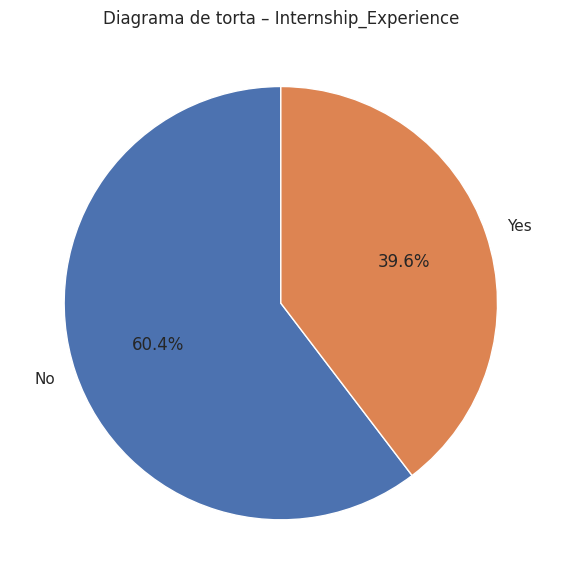

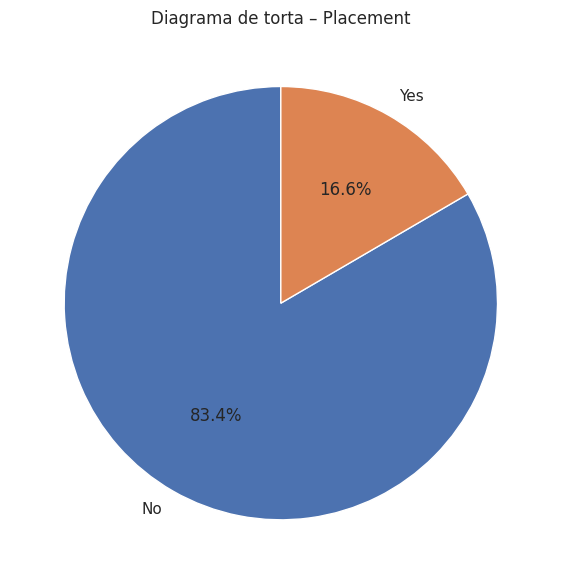

In [ ]:
# Diagramas de torta para categóricas “manejables” (<=10 categorías)
for c in cat_cols:
    counts = df[c].value_counts(dropna=False)
    if counts.shape[0] <= 10:
        plt.figure(figsize=(6, 6))
        counts.plot.pie(autopct="%1.1f%%", startangle=90)
        plt.ylabel("")
        plt.title(f"Diagrama de torta – {c}")
        plt.tight_layout()
        plt.show()
    else:
        # Si hay muchas categorías, mejor un barplot
        plt.figure(figsize=(10, 4))
        sns.countplot(y=c, data=df, order=counts.index)
        plt.title(f"Frecuencias – {c}")
        plt.tight_layout()
        plt.show()


El 60.4% de los estudiantes no realizó ninguna pasantia, y el 39.6% si lo hizo y en el otro grafico de torta se observa que el 83.4% y de los alumnos que hicieron la pasantia el 16.6% consiguió trabajo mientras que el 83.4% no esta ubicado en ningun trabajo

***Realizamos un estudio de Pearson para evaluar futuras regresiones posibles***


Correlación de Pearson IQ ~ CGPA
r = -0.0029 | p-valor = 0.775
Interpretación: asociación muy débil y no estadísticamente significativa (p ≥ 0.05).


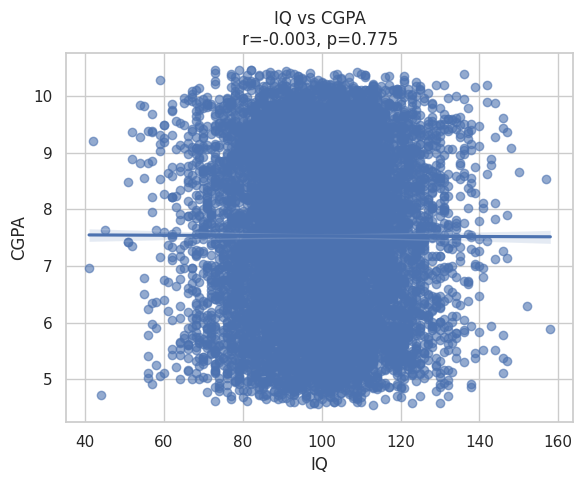


Correlación de Pearson Prev_Sem_Result ~ CGPA
r = 0.9808 | p-valor = 0
Interpretación: asociación muy fuerte y estadísticamente significativa (p < 0.05).


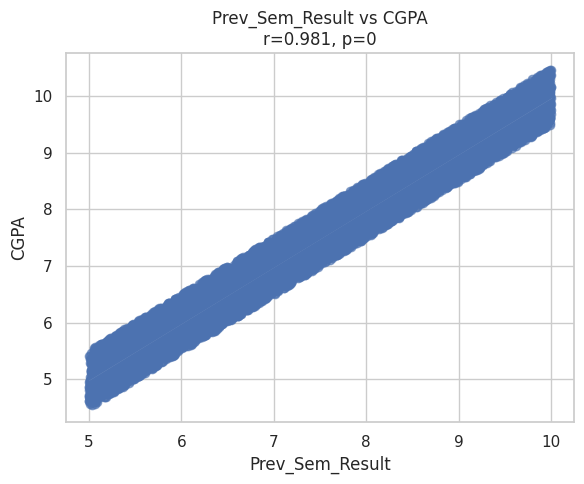

In [ ]:
#Correlaciones de Pearson
def correlacion_pearson(x, y, nombre_x, nombre_y, data):
    # Filtrar filas con ambos datos no nulos
    sub = data[[x, y]].dropna()
    if sub.empty:
        print(f"No hay datos suficientes para {nombre_x} vs {nombre_y}.")
        return None, None
    r, p = pearsonr(sub[x], sub[y])
    print(f"\nCorrelación de Pearson {nombre_x} ~ {nombre_y}")
    print(f"r = {r:.4f} | p-valor = {p:.4g}")
    # Interpretación breve
    magnitud = (
        "muy débil" if abs(r) < 0.2 else
        "débil"     if abs(r) < 0.4 else
        "moderada"  if abs(r) < 0.6 else
        "fuerte"    if abs(r) < 0.8 else
        "muy fuerte"
    )
    signif = "estadísticamente significativa (p < 0.05)" if p < 0.05 else "no estadísticamente significativa (p ≥ 0.05)"
    print(f"Interpretación: asociación {magnitud} y {signif}.")
# Gráfico de dispersión con recta de regresión
    plt.figure(figsize=(6, 5))
    sns.regplot(x=x, y=y, data=sub, ci=95, scatter_kws={"alpha": 0.6})
    plt.title(f"{nombre_x} vs {nombre_y}\nr={r:.3f}, p={p:.3g}")
    plt.tight_layout()
    plt.show()
    return r, p

# A) IQ vs CGPA (hipótesis: sin correlación)
if set(["IQ", "CGPA"]).issubset(df.columns):
    r1, p1 = correlacion_pearson("IQ", "CGPA", "IQ", "CGPA", df)
else:
    print("\nNo se encontraron ambas columnas 'IQ' y 'CGPA' para el análisis.")

# B) Prev_Sem_Result vs CGPA (hipótesis: sí hay correlación)
# Nota: si Prev_Sem_Result es categórica ordinal codificada como texto, hay que convertirla a numérica/ordinal.
if "Prev_Sem_Result" in df.columns and "CGPA" in df.columns:
    temp = df.copy()
    if temp["Prev_Sem_Result"].dtype == "O":
# Mapeo común (editar si tu dataset usa otros niveles)
        orden = {
            "Very Low": 1, "Low": 2, "Below Average": 3, "Average": 4,
            "Above Average": 5, "High": 6, "Very High": 7
        }
        temp["Prev_Sem_Result_num"] = temp["Prev_Sem_Result"].map(orden)
        if temp["Prev_Sem_Result_num"].isna().all():
# Si el mapeo falló, intentar convertir directo a categoría ordenada por frecuencia
            cats = temp["Prev_Sem_Result"].value_counts().index.tolist()
            cat_to_num = {c: i+1 for i, c in enumerate(cats)}
            temp["Prev_Sem_Result_num"] = temp["Prev_Sem_Result"].map(cat_to_num)

        print("\nPrev_Sem_Result mapeado a numérico para Pearson (ver 'Prev_Sem_Result_num').")
        r2, p2 = correlacion_pearson("Prev_Sem_Result_num", "CGPA", "Prev_Sem_Result (num)", "CGPA", temp)
    else:
        r2, p2 = correlacion_pearson("Prev_Sem_Result", "CGPA", "Prev_Sem_Result", "CGPA", temp)
else:
    print("\nNo se encontraron ambas columnas 'Prev_Sem_Result' y 'CGPA' para el análisis.")


Dado los resultados de Pearson deducimos que existe una correlacion entre los Promedios de los alumnos CGPA y los promedios de años anteriores, y no asi entre el IQ de los alumnos y su promedio CGPA

**Matriz de correlación**


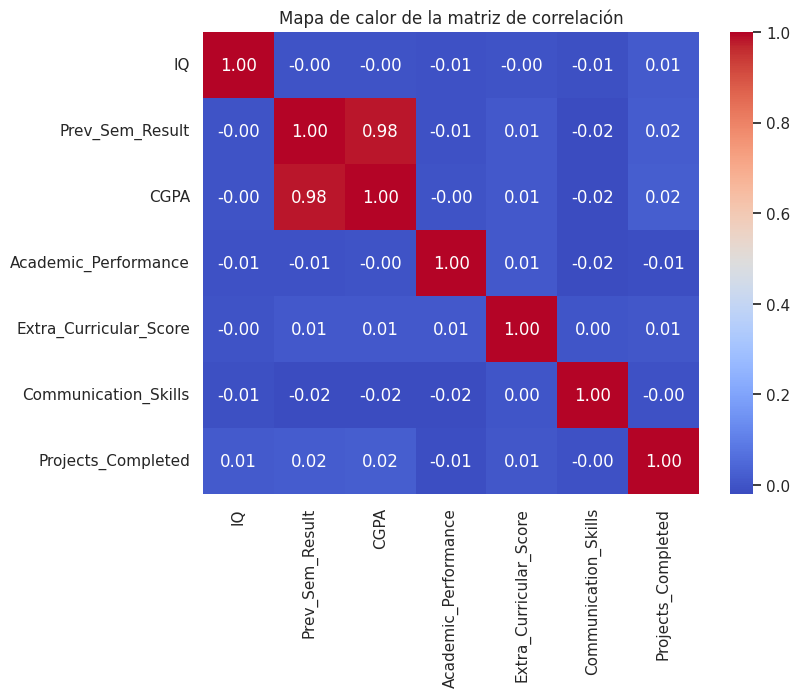

In [ ]:
# se toman sólo columnas numéricas
num_df = df.select_dtypes(include=['number'])
corr_mat = num_df.corr()

#print("Matriz de correlación:")
#print(corr_mat)

# heat map
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - Heat Map')
plt.show()

### <font color="#81C784">Interpretación de la matriz de correlación</font>  
La matriz de correlación revela que la única relación lineal fuerte, positiva y significativa es la existente entre el “Promedio ponderado de carrera” y los “Resultados semestre pasado” (r ≈ 0.98). Todas las demás correlaciones entre variables del conjunto de datos son muy bajas (cercanas a 0), lo que indica que no existe una relación lineal significativa entre ellas. Por lo tanto, salvo la relación esperada entre promedio y resultados en semestre anterior, no se identifican asociaciones lineales relevantes en los otros pares de variables.

# <font color="#4FC3F7">Interpretacion de los resultados: CORRELACION</font>  
El objetivo principal de esta tecnica en estudio es analiar si existe una correlacion entre dos variables que pueden ser significativas entre si, como lo es el IQ (variable x) y el promedio academico (variable y) o por otro lado el promedio general acumulado y el promedio de años anteriores

**1) Primer interpretacion**

IQ (x) vs CGPA (y)

Variable X: IQ

Variable Y: CGPA

Coeficiente de Pearson (r): ≈ −0,003

p-valor: ≈ 0,775

Relación entre variables: el valor de r está prácticamente en cero y el p-valor es muy alto. Interpretación de coeficientes:r≈−0,003 implica asociación lineal nula (o muy, muy débil y negativa irrelevante en la práctica).

Significancia estadística: con 𝛼 =0,05, no se rechaza H0 (ρ=0). No hay evidencia de correlación lineal.

Tamaño del efecto: 𝑅2=𝑟2≈0,000009 → 0% de la variabilidad de CGPA se explica por IQ. Conclusión: En este conjunto de datos, IQ no se asocia linealmente con CGPA. El scatter con la recta casi horizontal refuerza esta ausencia de patrón.

**2) Segunda interpretación**

Variable X: Prev_Sem_Result

Variable Y: CGPA

Coeficiente de Pearson (r): ≈ 0,981

p-valor: ≈ 0,000 (numéricamente indistinguible de 0)

Relación entre variables: asociación lineal positiva extremadamente fuerte: a mayor resultado del semestre previo, mayor CGPA.

Interpretación de coeficientes: r≈0,981 está muy cerca de 1 → relación casi perfecta. Significancia estadística: con α=0,05, se rechaza 𝐻0 con holgura; la correlación es estadísticamente significativa

Tamaño del efecto: 𝑅2= r2≈0,962 → ≈96% de la variabilidad de CGPA se explica linealmente por Prev_Sem_Result

# <font color="#FFB74D">Tecnica 2: Regresión Lineal Simple</font>  

=== Promedio ponderado de carrera ~ Resultados semestre pasado (HC3) ===
                                  OLS Regression Results                                 
Dep. Variable:     Promedio ponderado de carrera   R-squared:                       0.962
Model:                                       OLS   Adj. R-squared:                  0.962
Method:                            Least Squares   F-statistic:                 2.536e+05
Date:                           Tue, 16 Sep 2025   Prob (F-statistic):               0.00
Time:                                   12:43:43   Log-Likelihood:                -1704.0
No. Observations:                          10000   AIC:                             3412.
Df Residuals:                               9998   BIC:                             3426.
Df Model:                                      1                                         
Covariance Type:                             HC3                                         
                           

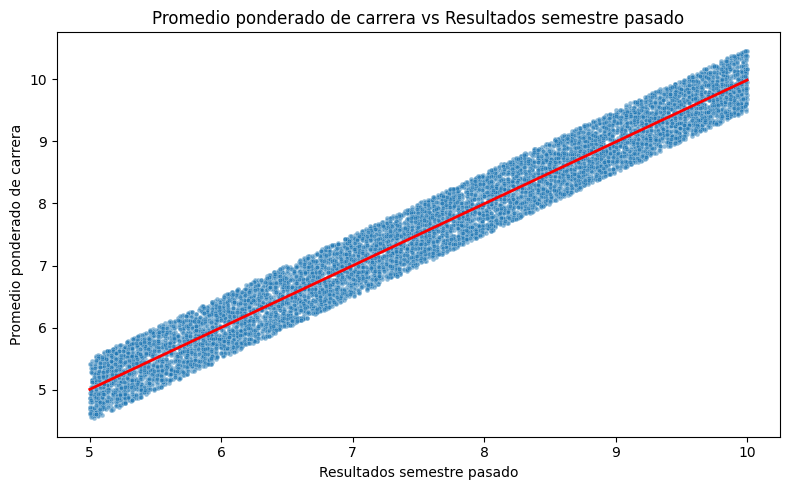

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#carga data set
df = pd.read_csv('/content/Datos_Estudiantes.csv')

#renombro columnas para que sea mas legible
df = df.rename(columns={'CGPA': 'Promedio ponderado de carrera', 'Prev_Sem_Result': 'Resultados semestre pasado'})

def reg_simple(df, ycol, xcol):
    #limpio los datos sacando los #n/a y trabajo sobre la copia del df
    sub = df[[ycol, xcol]].dropna().copy()
    y = sub[ycol]
    x = sub[xcol]
    #agrego la variable independiente al modelo
    X = sm.add_constant(x)
    #realizo el entrenamiento
    m = sm.OLS(y, X).fit(cov_type='HC3')
    print(f"=== {ycol} ~ {xcol} (HC3) ===")
    print(m.summary())
    r = np.corrcoef(x, y)[0,1]
    print(f"Pearson r = {r:.3f}  |  R^2 = {r**2:.3f}")

    order = np.argsort(x.values)
    #defino el tamaño de la figura
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x, y=y, s=12, alpha=0.5)
    plt.plot(x.values[order], m.fittedvalues.values[order], lw=2, color='red')
    plt.xlabel(xcol); plt.ylabel(ycol)
    plt.title(f'{ycol} vs {xcol}')
    plt.tight_layout(); plt.show()
    return m


m_prev = reg_simple(df, 'Promedio ponderado de carrera', 'Resultados semestre pasado')





# <font color="#FFB74D">Interpretación de resultados: Regresión Lineal Simple</font>  

En este análisis se evaluó la relación entre:  

- **Variable dependiente (Y):** Promedio ponderado de carrera  
- **Variable independiente (X):** Resultados del semestre pasado  

El objetivo principal fue determinar en qué medida el desempeño del último semestre explica el promedio acumulado de la carrera y si la relación es estadísticamente significativa.  

---

## <font color="#FFB74D">Resumen del modelo</font>  

| Métrica | Valor |
|---------|-------|
| Coeficiente de correlación (r) | 0.981 |
| Coeficiente de determinación (R²) | 0.962 |
| Ecuación del modelo | Promedio ponderado = 0.0261 + 0.9961 × Resultados semestre pasado |
| Significancia (p-valor) | < 0.001 |

---

## <font color="#FFB74D">Desarrollo de la interpretación</font>  

**→ Relación entre variables**  
El coeficiente de correlación de Pearson (r = 0.981) refleja una **asociación positiva muy fuerte**.  
Esto indica que un buen desempeño en el semestre pasado suele estar acompañado de un promedio acumulado elevado.  

**→ Explicación de la variabilidad**  
El coeficiente de determinación (R² = 0.962) indica que el **96.2% de la variación** en el promedio de carrera se explica por los resultados del semestre pasado.  
Aunque este valor es alto, es un resultado **esperable**, ya que ambas variables están estructuralmente vinculadas: el promedio acumulado integra directamente el rendimiento de cada semestre.  

**→ Interpretación de los coeficientes**  
- Intercepto (β₀ = 0.0261): valor estimado del promedio acumulado cuando los resultados del semestre pasado son 0. Carece de relevancia práctica en este contexto.  
- Pendiente (β₁ = 0.9961): por cada punto adicional en el semestre pasado, el promedio de carrera aumenta casi en **un punto**. La relación lineal es prácticamente perfecta.  

**→ Significancia estadística**  
El p-valor < 0.001 confirma que la relación entre ambas variables es **estadísticamente significativa**, por lo que la probabilidad de que el resultado se deba al azar es prácticamente nula.  

---

## <font color="#FFB74D">Consideraciones metodológicas</font>  

— El elevado R² no debe interpretarse como causalidad.  
— Lo que se observa es una **asociación esperada** derivada de cómo se construyen ambas variables.  


---

## <font color="#FFB74D">Conclusiones</font>  

1. Existe una **asociación lineal fuerte, positiva y significativa** entre los resultados del semestre pasado y el promedio acumulado de carrera.  
2. El modelo permite realizar **predicciones precisas** del promedio de carrera a partir del rendimiento en semestres recientes.  
3. Sin embargo, el **alto ajuste se debe en gran medida a dependencia matemática**, por lo que no constituye evidencia de causalidad.  
4. Este análisis es ilustrativo para mostrar cómo la regresión lineal simple captura asociaciones.  


**EVIDENCIA N°3**

Dimensiones: (10000, 10)


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No



================= MODELO A (múltiple, con Academic_Performance) =================
                            OLS Regression Results                            
Dep. Variable:                   CGPA   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 3.162e+04
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:40:06   Log-Likelihood:                -1289.4
No. Observations:                7500   AIC:                             2593.
Df Residuals:                    7493   BIC:                             2641.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

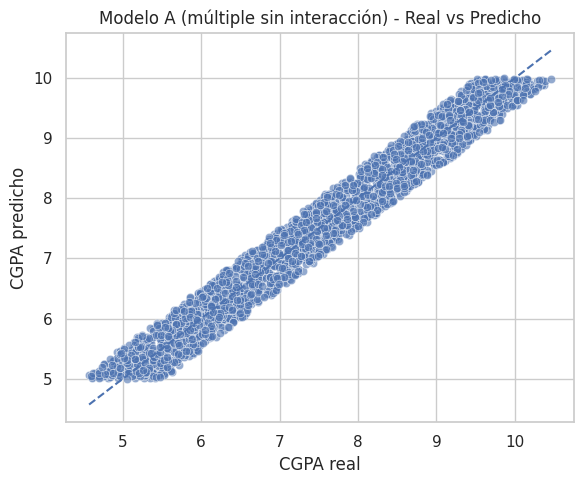

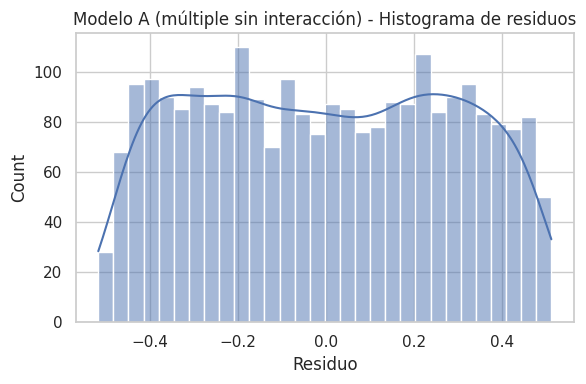


--- Modelo C (múltiple con interacción): métricas en TEST ---
MAE  : 0.2484
RMSE : 0.2854
R²   : 0.9616

P-values (α=0.1):
Prev_Sem_Result           0.000000
IQ                        0.277211
Projects_Completed        0.340593
Communication_Skills      0.358239
Academic_Performance      0.376211
APxPrev                   0.599119
Extra_Curricular_Score    0.676332
const                     0.750679
dtype: float64

Significancia (True = significativo a 10%):
const                     False
IQ                        False
Prev_Sem_Result            True
Academic_Performance      False
Communication_Skills      False
Extra_Curricular_Score    False
Projects_Completed        False
APxPrev                   False
dtype: bool


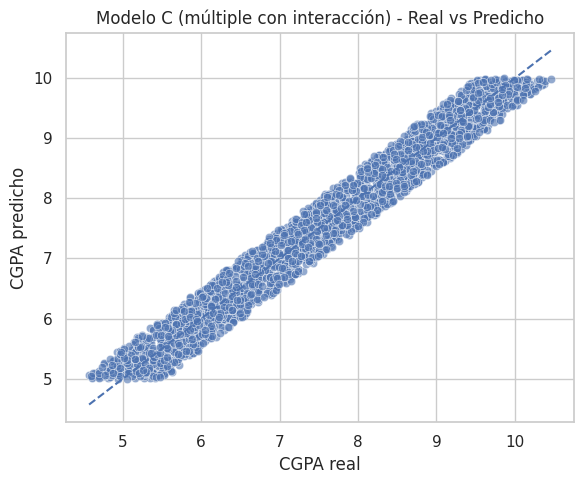

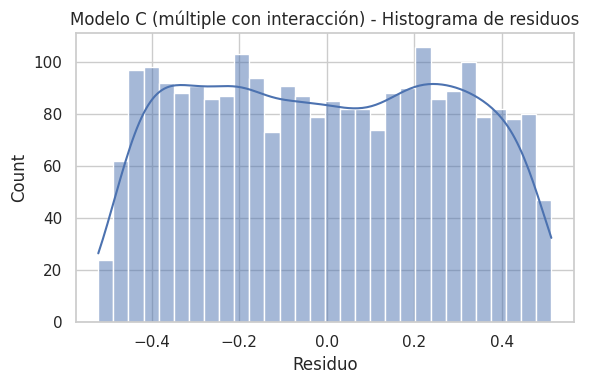


>>> Interpretación – Modelo A (múltiple sin interacción) (α=0.1)
- Intercepto (const): CGPA esperado cuando el resto está en 0 (sirve de referencia).
- Coeficientes: cambio esperado en CGPA si esa variable sube 1 unidad,
  manteniendo las demás constantes. Signo +/− indica dirección del efecto.
- Miramos p-values < 0.10 para decidir significancia estadística.
- Comparar R² y error (MAE/RMSE) entre modelos para ver si la interacción ayuda.

>>> Interpretación – Modelo C (múltiple con interacción) (α=0.1)
- Intercepto (const): CGPA esperado cuando el resto está en 0 (sirve de referencia).
- Coeficientes: cambio esperado en CGPA si esa variable sube 1 unidad,
  manteniendo las demás constantes. Signo +/− indica dirección del efecto.
- APxPrev (interacción): si es significativo, el efecto de Academic_Performance
  sobre CGPA depende del nivel de Prev_Sem_Result (y viceversa).
- Miramos p-values < 0.10 para decidir significancia estadística.
- Comparar R² y error (MAE/RMSE) entre modelos p

In [2]:
# REGRESIÓN LINEAL MÚLTIPLE
# ============================================================

# Tratamiento de datos
# ============================================================
import pandas as pd
import numpy as np

# Gráficos
# ============================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm

# Configuración matplotlib
# ============================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ============================================================
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", context="notebook")

ALPHA = 0.10  # nivel de significancia del 10%

# ------------------------------------------------------------
# 1) Cargar dataset
# ------------------------------------------------------------
url_raw = "https://raw.githubusercontent.com/cjuangab/EstadisticayExploraciondeDatosII/main/Datos/Datos_Estudiantes.csv"
df = pd.read_csv(url_raw)

print("Dimensiones:", df.shape)
display(df.head())

# ------------------------------------------------------------
# 2) Limpieza mínima
# ------------------------------------------------------------
if "College_ID" in df.columns:
    df = df.drop(columns=["College_ID"])

cols_posibles = ["IQ","Prev_Sem_Result","Academic_Performance",
                 "Communication_Skills","Extra_Curricular_Score",
                 "Projects_Completed","CGPA"]
faltantes = [c for c in cols_posibles if c not in df.columns]
if faltantes:
    print("Ojo: faltan columnas esperadas:", faltantes)

for c in cols_posibles:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=[c for c in cols_posibles if c in df.columns]).copy()

# ------------------------------------------------------------
# 3) Variables
# ------------------------------------------------------------
y = df["CGPA"]

# Modelo A: múltiple "normal" (incluye Academic_Performance)
XA_cols = ["IQ","Prev_Sem_Result","Academic_Performance",
           "Communication_Skills","Extra_Curricular_Score",
           "Projects_Completed"]
XA_cols = [c for c in XA_cols if c in df.columns]
XA = df[XA_cols].copy()

# Interacción: Academic_Performance × Prev_Sem_Result
if set(["Academic_Performance","Prev_Sem_Result"]).issubset(df.columns):
    df["APxPrev"] = df["Academic_Performance"] * df["Prev_Sem_Result"]
else:
    df["APxPrev"] = np.nan  # por las dudas

# Modelo C: con interacción
XC_cols = XA_cols + ["APxPrev"]
XC_cols = [c for c in XC_cols if c in df.columns]
XC = df[XC_cols].copy()

# Split (mismo para ambos para comparar bien)
XA_train, XA_test, y_train, y_test = train_test_split(
    XA, y, test_size=0.25, random_state=42
)
XC_train, XC_test, _, _ = train_test_split(
    XC, y, test_size=0.25, random_state=42
)

# ------------------------------------------------------------
# 4) Entrenamiento OLS
# ------------------------------------------------------------
def entrenar_ols(X_train, y_train):
    Xc = sm.add_constant(X_train, prepend=True)
    return sm.OLS(y_train, Xc).fit()

modelo_A = entrenar_ols(XA_train, y_train)
modelo_C = entrenar_ols(XC_train, y_train)

print("\n================= MODELO A (múltiple, con Academic_Performance) =================")
print(modelo_A.summary())

print("\n================= MODELO C (múltiple, con interacción APxPrev) ==================")
print(modelo_C.summary())

# ------------------------------------------------------------
# 5) Evaluación y significancia al 10%
# ------------------------------------------------------------
def evaluar_modelo(modelo, X_test, y_test, nombre="Modelo", alpha=0.10):
    Xc_test = sm.add_constant(X_test, prepend=True)
    y_pred = modelo.predict(Xc_test)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    print(f"\n--- {nombre}: métricas en TEST ---")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

    # P-values y significancia con alpha=0.10
    print(f"\nP-values (α={alpha}):")
    pv = modelo.pvalues.sort_values()
    print(pv)
    sig = (modelo.pvalues < alpha)
    print("\nSignificancia (True = significativo a 10%):")
    print(sig)

    # Real vs Predicho
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], linestyle="--")
    plt.xlabel("CGPA real")
    plt.ylabel("CGPA predicho")
    plt.title(f"{nombre} - Real vs Predicho")
    plt.tight_layout()
    plt.show()

    # Residuos
    resid = y_test - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(resid, bins=30, kde=True)
    plt.title(f"{nombre} - Histograma de residuos")
    plt.xlabel("Residuo")
    plt.tight_layout()
    plt.show()

evaluar_modelo(modelo_A, XA_test, y_test, nombre="Modelo A (múltiple sin interacción)", alpha=ALPHA)
evaluar_modelo(modelo_C, XC_test, y_test, nombre="Modelo C (múltiple con interacción)", alpha=ALPHA)

# ------------------------------------------------------------
# 6) Interpretación
# ------------------------------------------------------------
def interpreta(modelo, nombre, alpha=0.10):
    print(f"\n>>> Interpretación – {nombre} (α={alpha})")
    print("- Intercepto (const): CGPA esperado cuando el resto está en 0 (sirve de referencia).")
    print("- Coeficientes: cambio esperado en CGPA si esa variable sube 1 unidad,")
    print("  manteniendo las demás constantes. Signo +/− indica dirección del efecto.")
    if "APxPrev" in modelo.params.index:
        print("- APxPrev (interacción): si es significativo, el efecto de Academic_Performance")
        print("  sobre CGPA depende del nivel de Prev_Sem_Result (y viceversa).")
    print("- Miramos p-values < 0.10 para decidir significancia estadística.")
    print("- Comparar R² y error (MAE/RMSE) entre modelos para ver si la interacción ayuda.")

interpreta(modelo_A, "Modelo A (múltiple sin interacción)", alpha=ALPHA)
interpreta(modelo_C, "Modelo C (múltiple con interacción)", alpha=ALPHA)
